In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Visualize ECoG electrodes, speech task dataset, 46-64 channels [Miller 2016]
Authored by Eric Easthope

MIT License
Copyright (c) 2022
"""

# !pip install matplotlib scipy --quiet

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# Visualize ECoG electrodes
Authored by Eric Easthope

Stanford's "library of human electrocorticographic (ECoG) data and analyses" [Miller 2016] has two speech-related datasets: `speech_basic/` and `speech_lists/`, both available [here](https://exhibits.stanford.edu/data/catalog/zk881ps0522). If we download `speech_basic/` and point Python to where it is with `DIR` we can see each of the subject IDs as `subject_ids`. Invalid data can be filtered out here using `bads` if we already know which subject IDs we want to remove.

In [2]:
# Set data directory
# Get subject IDs
DIR = "data/stanford-ecog/speech_basic/"
subject_ids = [os.path.basename(f).split("_")[0] for f in glob.glob(f'{DIR}/brains/*.mat')]

# Filter "bad" brains (invalid data)
bads = ['wc']
subject_ids = [id for id in subject_ids if id not in bads]
subject_ids

['jc', 'bp', 'zt', 'ww', 'hl', 'in']

SciPy loads each MAT file as a dictionary, so if we load all the MAT files and look at the first file as `datum` we see it contains brain and ECoG electrode coordinate data as `"brain"` and `"locs"` keys.

In [3]:
# Load brain data for each subject ID
datas = [loadmat(f"{DIR}/brains/{id}_brain.mat") for id in subject_ids if id != 'wc']

# Get first subject data
datum = datas[0]
datum.keys()

dict_keys(['__header__', '__version__', '__globals__', 'brain', 'locs'])

Each subject brain has vertices and faces that specify a 3D brain surface by index. We only need `vertices` to visualize subject brains, but we might want the faces too. So, because of an indexing difference between MATLAB and Python we shift the indices of `faces` by 1.

In [4]:
# Get subject brain data as vertices, faces
# Shift face indices
vertices = datum["brain"][0][0][0]
faces = datum["brain"][0][0][1] - 1
vertices, faces

(array([[ 13.27593362, -48.32986238, -48.95094449],
        [ 13.27593362, -49.00678495, -48.85979237],
        [ 14.06229247, -48.32986238, -48.85979237],
        ...,
        [ 20.38371312, -19.91792371,  76.83050506],
        [ 19.36831605, -19.91792371,  76.85555514],
        [ 18.35291898, -19.91792371,  76.84069977]]),
 array([[    0,     1,     2],
        [    0,     3,     1],
        [    1,     3,     4],
        ...,
        [82547, 83496, 82549],
        [82549, 83496, 83497],
        [82549, 83497, 82510]], dtype=int32))

Electrode coordinates are specified the same way.

In [5]:
# Get subject electrode data as vertices
# Show first five vertices
locs = datum["locs"]
locs[:5]

array([[-55.63844383, -50.27024081,  25.43053561],
       [-58.1055974 , -38.72111472,  25.14884961],
       [-59.        , -27.45367463,  23.8812626 ],
       [-57.05747982, -16.60876355,  23.59957659],
       [-56.        ,  -5.90469547,  22.61367559]])

We can also figure out how many electrodes each subject brain has.

In [6]:
# Get total electrode vertices for each subject
[len(d["locs"]) for d in datas]

[48, 48, 62, 46, 64, 62]

With `vertices` and `locs` we can visualize ECoG electrodes on each subject's cortical brain surface.

/Users/ericeasthope/.pyenv/versions/3.8.13/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


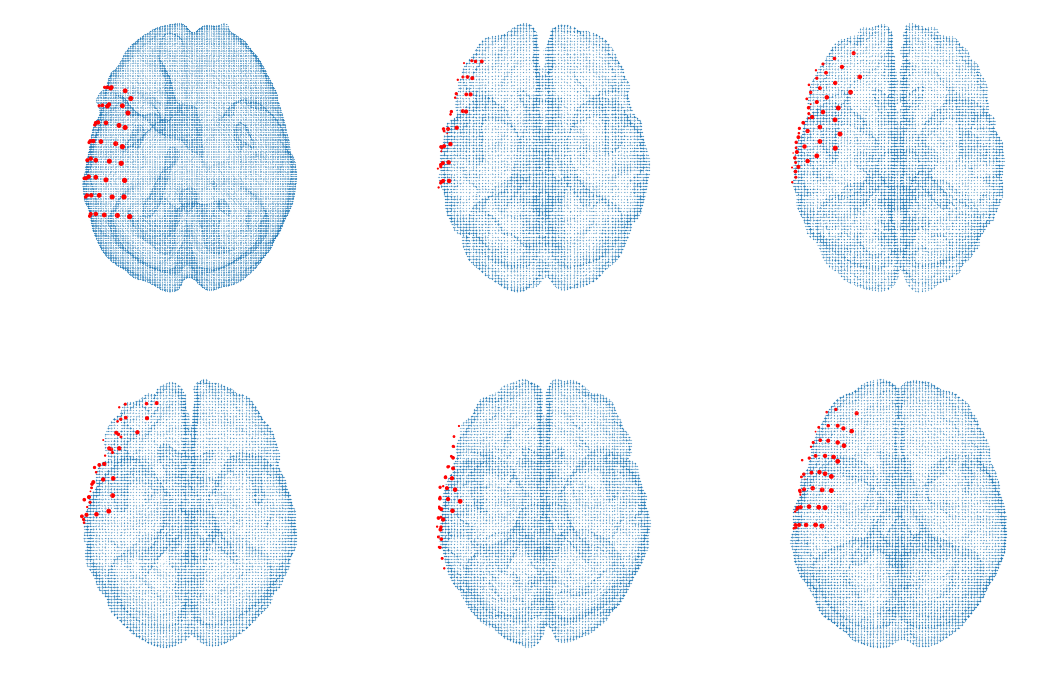

In [7]:
# Get average number of brain vertices
# NOTE: Holds out first brain skews average
N = np.mean([d["brain"][0][0][0].shape[0] for d in datas[1:]])

def plot_brain(index, ax, dark=False):
    # Get brain data as vertices, faces
    # Get electrode data as vertices
    v = datas[index]["brain"][0][0][0]
    locs = datas[index]["locs"]
    
    # Get number of brain vertices
    # Plot brain, electrode vertices
    # Manually scale plot marker size
    # NOTE: only for perceptual uniformity
    n, _ = v.shape
    ax.scatter(*v[:, :2].T, s=1e-2 * (N / n))
    ax.scatter(*locs.T, c='r', marker='.')
    
    # Add grid lines 
    ax.grid(linewidth=1, color="w" if dark else "k", alpha=1e-1)
    
    # Force square grid
    # Make background transparent
    # Remove plot border
    ax.set_aspect("equal")
    ax.patch.set_alpha(0.0)
    for spine in ax.spines.values():
        spine.set_edgecolor(None)
    
    # Set axis colors
    ax.tick_params(axis='x', colors='w' if dark else "k")
    ax.tick_params(axis='y', colors='w' if dark else "k")

    # Set plot padding, label size
    plt.rcParams['xtick.major.pad'] = 8
    plt.rcParams['ytick.major.pad'] = 8
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10

# Plot subject brains, electrodes
fig, axs = plt.subplots(2, 3, figsize=(18,12), subplot_kw=dict(box_aspect=1))
for i, id in enumerate(subject_ids):
    plot_brain(i, axs[i//3, i % 3], dark=True)

**end**.